# Research on Car Sales Advertisements

There are hundreds of free advertisements for vehicles sales published every day. As an analyst at Crankshaft List, we need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Here are the steps followed to complete the project:



##  Step 1: Open the data file and study the general information. 

In [1]:
 # Import default libraries
    
import pandas as pd # manipulate and wrangle the data  
import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics

from scipy import stats # for mathematics, science, and engineering

In [2]:
#read data from file 'vehicles_us.csv'
df = pd.read_csv('/datasets/vehicles_us.csv')

# preview the loaded data
df.info()

# provides descriptive statistics
display(df.describe(include= 'all')) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [3]:
# return the top n- rows of dataframe
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


#### Conclusion:

- We checked the general information of 'vehicles_us' file.

- Upon checking data, we found that there is not a column like car_id that uniquely identifies a car. Because of that, there's not enough information to conclude that duplicate rows belong to the same car/customer or not.

- The 'price' range of cars ranges from 1 to 375000. Price under 100 sounds strange to me. We'll check in detail further if there's any correlation with other columns.

- The 'model_year' , 'cylinder', 'point_color', 'odometer' and 'is_4wd'columns are found to be blank (missing values). These are keys things that people check when they buy a car. At this point, we are not sure why those columns havng missing values.However, missing values are significantly less. We will dig in more detail in the steps below.

- The 'is_4wd' , 'odometer' and 'model_year' columns are float datatypes  and 'date_posted' should be date type. This could probably be an error in the data retrieving process.

- The 'is_4wd' is a boolean column represented by o's and 1s.


## Step 2:  Data preprocessing:
In this step, we are viewing the data in more detail to identify missing values, data types and address potential duplicates.

### Checking  missing values 

In [4]:

#display all missing values columns along with %

total = df.isnull().sum().sort_values(ascending=False)
percent =total/len(df)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent']).head(8)



,Total,Percent
is_4wd,25953,50.369723
paint_color,9267,17.985444
odometer,7892,15.316836
cylinders,5260,10.208637
model_year,3619,7.023775
days_listed,0,0.000000
date_posted,0,0.000000
type,0,0.000000


Conclusion: Upon checking data, found out that there are missing values in 'model_year', 'cylinders','odometer', 'paint_color' and 'is_4wd' columns. There could be missing values for a number of reasons like observations that were not recorded and data corruption and many more. Missing values can be replaced with statistical measures (mean/median). However, we need to be careful. We have to make sure that values we replace don't make significant impact on data. Some data description show that they have potential outliers in the quantitative values (data). We'll further investigate and impute missing values in the steps below.




### Handing Missing Values for 'is_4wd', 'model_year','paint_color', 'odometer' , 'cylinders' columns

In [5]:
# 1)'is_4wd' column

df['is_4wd'] = df['is_4wd'].fillna(0)

df['is_4wd'].unique()


array([1., 0.])

Conclusion: The 'is_4wd' column has 50% missing values. Based on the values, it looks like the column is boolean type. If 1's are for 4wd then blanks ones are obviously not 4wd as there's not a single 0's. Hence, we can conclude that blank/missing values ones are 0's. Therefore, we backfilled the column with zeros. 


In [6]:
# 2)'model_year' column

## 3619 nulls model years
# checking if blank 'model_year's have dependency to type
df[df['model_year'].isnull()]['type'].value_counts()

# checking if blank 'model_year's have dependency to model
df[df['model_year'].isnull()]['model'].value_counts()

# checking if blank 'model_year's have dependency to paint_color
df[df['model_year'].isnull()]['paint_color'].value_counts()

#correlation_df = df.corr()
#print(correlation_df)
#df['model_year']=df['model_year'].fillna((df['model_year'].median()))
df['model_year'] = df['model_year'].fillna(round(df.groupby('model')['model_year'].transform('median'),0))






In [7]:
df[df['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Conclusion: The 'model_year' column has 7% missing values. Before we impute missing values with mean/median, let's first analyze if 'model_year' is correlated with any other columns. 
Based on the correlation data above, there's no clear correlation between 'model_year' and other columns. We checked if missing values in 'model_year'is dependent on any columns above. However, we couldn't find any evidence/connection. So, we replaced missing values with the median of the'model_year' column based on car model. 

In [8]:
# 3)'paint_color' column

## 9267 nulls paint_color

# checking if blank 'paint_color's have dependency to type
df[df['paint_color'].isnull()]['type'].value_counts()

# checking if blank 'paint_color's have dependency to model
df[df['paint_color'].isnull()]['model'].value_counts()

# checking if blank 'paint_color's have dependency to model_year
df[df['paint_color'].isnull()]['model_year'].value_counts()


df['paint_color']=df['paint_color'].fillna(value = 'no_color')

#df['paint_color'].value_counts()


Conclusion: The 'paint_color' column has 17% missing values.We don't know why the 'paint_color' column was left blank. Hence, we analyzed this column with other columns to see if there is a pattern or correlation with other columns like type, model, and transmission. We couldn't find a clear connection of missing values in 'paint_color'. Since, there's no connection of missing values in 'paint_color' with other columns, some people purposely left it blank. We filled these missing values with the default hardcoded value 'no_color'.

In [9]:
# 4) 'odometer' column

# 7892 missing values

# checking if blank 'odometer's have dependency to type
df[df['odometer'].isnull()]['type'].value_counts()

# checking if blank 'odometer's have dependency to model
df[df['odometer'].isnull()]['model'].value_counts()

# checking if blank 'odometer's have dependency to model_year
df[df['odometer'].isnull()]['model_year'].value_counts()

# checking if blank 'odometer's have dependency to condition
df[df['odometer'].isnull()]['condition'].value_counts()

#df['odometer']=df['odometer'].fillna((df['odometer'].median()))

df['odometer'] = df['odometer'].fillna(round(df.groupby(['model','model_year'])['odometer'].transform('median'),0))




In [75]:
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
1101,9200,1975.0,ford f-150,excellent,NaN,gas,NaN,automatic,truck,green,0.0,2018-08-28,40
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48453,4600,1994.0,ford f150,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-10-05,60
48483,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-19,27
50062,1695,1991.0,jeep cherokee,fair,6.0,gas,NaN,automatic,SUV,white,1.0,2018-05-25,16
50547,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-28,49


There are still 83 rows that have missing values in 'odometer' column. Let's investigate why it is so. It looks like majority(41 rows) of missing ones have model type 'mercedes-benz benze sprinter 2500'  and with rest of them,  we couldn't find any correlation with other columns. Since there is no value for these models, let's just DROP these columns in steps below (check duplicate section).

In [10]:
df.query('model =="mercedes-benz benze sprinter 2500"').shape[0]

41

Conclusion: The 'odometer' column has 15% missing values which are considerably less. We also don't know why the 'odometer' column has missing values. Hence, we analyzed this column with other columns to see if there is a pattern or relation with other columns like type, model,model_year and transmission. The first thing that comes to mind when the odometer is blank is probably because cars are new or too old. So, we checked the conditions of those missing values. We also checked if something to do with the type of car which isn't, apparently. We couldn't find the clear connection of missing values in the 'paint_color'. Since there's no connection of missing values in the 'odometer' with other columns, we just filled them by the median value of the odometer based on car model and year.

In [11]:
#5) 'cylinders'column

# 5260 missing values

#df[(df['cylinders'].isnull())] & (df['fuel']=='electric')]
 
    # checking if blank 'cylinders's have dependency to type
df[df['cylinders'].isnull()]['type'].value_counts()

# checking if blank 'cylinders's have dependency to model
df[df['cylinders'].isnull()]['model'].value_counts()

# checking if blank 'cylinders's have dependency to model_year
df[df['cylinders'].isnull()]['model_year'].value_counts()

# checking if blank 'cylinders's have dependency to condition
df[df['cylinders'].isnull()]['condition'].value_counts()

#df['cylinders']=df['cylinders'].fillna((df['cylinders'].median()))


df['cylinders'] = df['cylinders'].fillna(round(df.groupby('model_year')['cylinders'].transform('median'),0))


In [11]:
df[df['cylinders'].isnull()]

#df.dropna(inplace = True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10


There are two missing values in 'cylinders' column.Looking at these rows, we couldn't find any correlation. Hence, we will DROP these two rows in the step below.

Conclusion: The 'cylinders' column has 10% missing values. As we know that electric cars do not have cylinders, we first checked if those missing values are for electric cars. However, that's not the case here. We confirmed that zero-cylinder are electric cars for sure. We checked dependencies with model, model_year, condition and type columns but we couldn't find a clear pattern. So, we replaced missing values in the 'cylinders' column with the median of the 'cylinders' column based on carmodel.

In [12]:
## dropping missing values for 'cylinder' and 'model' columns
df.dropna(inplace = True)

In [13]:
# Just checking if there's any mising values
df.isna().sum()



price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Checking for duplicates


In [14]:
# drop all those rows containing missing values to avoid any error

df.dropna(inplace = True)
# drop duplicates
df.drop_duplicates(inplace = True)
print('Dataframe shape is:', df.shape)

#df.info()

Dataframe shape is: (51440, 13)


 ### Checking  Data Types of columns

In [15]:
#converting float data numbers into integers
df['model_year'] = df['model_year'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(int)
df['cylinders'] =df['cylinders'].astype(int)

#converting float data numbers into date time
df['date_posted'] = pd.to_datetime(df['date_posted'], format = "%Y-%m-%d")

# checking data types after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51440 entries, 0 to 51524
Data columns (total 13 columns):
price           51440 non-null int64
model_year      51440 non-null int64
model           51440 non-null object
condition       51440 non-null object
cylinders       51440 non-null int64
fuel            51440 non-null object
odometer        51440 non-null float64
transmission    51440 non-null object
type            51440 non-null object
paint_color     51440 non-null object
is_4wd          51440 non-null int64
date_posted     51440 non-null datetime64[ns]
days_listed     51440 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.5+ MB


In [16]:
# check data types of columns
print(df.dtypes)

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object


Conclusion: Upon checking data, found out that 'model_year', 'cylinders', 'odometer' and 'is_4wd' columns are float types. Possible reasons for being float could be bugs in the data retrieval process. We will convert them to whole numbers (integers) in the steps below.

Conclusion:
We converted the data types of 'model_year', 'is_4wd', 'cylinders', and 'date_posted' columns as required.

## Step 3: Make calculations and add them to the table
 We will calculate and add the following columns
 
1. Day of the week, month, and year the ad was placed
2. The vehicle's age (in years) when the ad was placed
3. The vehicle's average mileage per year


In [29]:
# calculating day of the week, month, and year
df['day_of_the_week'] = df['date_posted'].dt.weekday

# calculating day of the month
df['month'] = df['date_posted'].dt.month

# calculating day of the year
df['year'] = df['date_posted'].dt.year

# vehicle's age (in years)
df['vehicle_age'] = df['year'] - df['model_year']

# calculating vehicle's average mileage per year
df['avg_mileage'] = (df['odometer']/df['vehicle_age']).where (df['vehicle_age']!=0)



In [30]:
# Replacing string values with numeric values for 'condition' column

def conditions(num):
    condition = num['condition']
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    return 0

df['condition']= df.apply(conditions, axis = 1)
#print(df['condition'].value_counts())
#print(df['condition'])

Conclusion: We calculated day of the week, month, and year. We also calculated vehicle's age and vehicle's average mileage per year. 
    

## Step 4: Carry out exploratory data analysis

•	Studying the following parameters: price, vehicle's age (when the ad was placed), mileage, number of cylinders, and condition. 
•	Plotting histograms for each of these parameters. 


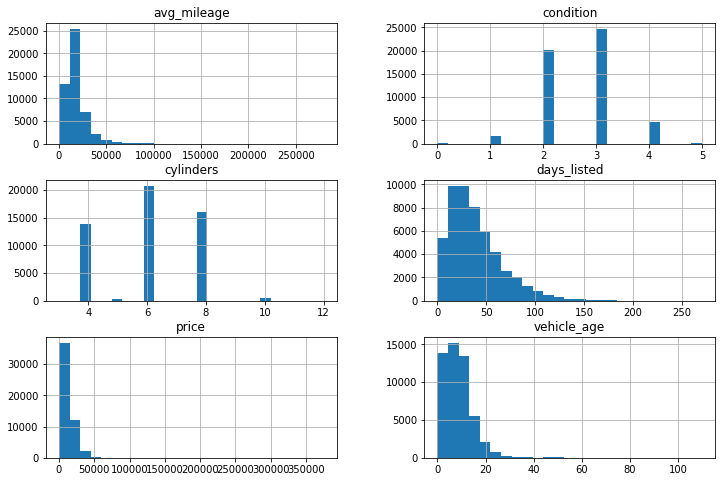

In [31]:
#Plotting histograms for each parameter

hist_df = df[['price','vehicle_age','avg_mileage','cylinders','condition','days_listed']]

hist_df.hist(figsize =(12,8),bins=25)

plt.show()

•	Determine the upper limits of outliers
•	Remove the outliers
•	Store the outliers in a separate DataFrame, and continue the work with the filtered data.

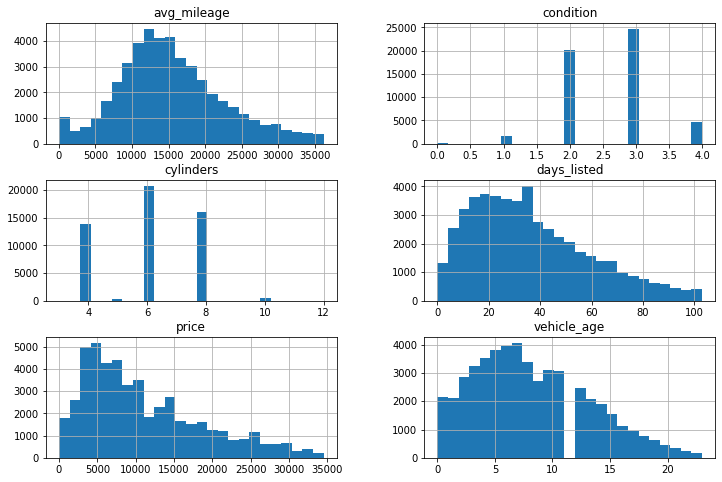

In [32]:
#Filter outliers and replot histogtrams

# The rule of thumb is that anything not in the range of 
#(Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed

Q1 = hist_df.quantile(0.25)
Q3 = hist_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

filtered_df = hist_df[(hist_df < (Q3 + 1.5 * IQR))]
filtered_df.hist(figsize=(12,8),bins= 25)
plt.show()

•	Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

Conclusion: 

 We plotted histograms with 'price', 'vehicle_age', 'avg_mileage', 'cylinders' and 'condition' parameters using hist(). During data analysis, we detected the outliers. We saw some outliers extended to the data. To remove outliers, we calculated the IQR scores. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. We filtered data and considered only those data less than (Q3 + 1.5 IQR) and replotted histogram. 
 
Based on histograms plotted above, we concluded that:
'Condition' - When car condition is excellent, it is most frequently advertised. There are fewer outliers but that doesn't effect the readability of the histogram.

'cylinders'- Most frequently used cylinders numbers are 8 and 6. As there are no outliers in this column, the readability of histograms do not effect much and are same with and without outliers.

'avg_mileage' -  From the histogram above, it was concluded that car mileage ranged from 0 to 2000 with outliers and without outliers ranged from 0 to 3000. Hence, avg_mileage affects the readability of the program.

'price' -The histogram is much flatter without outliers. Hence, affects the readability of the program.

'vehicle_age' - Without outliers, the histogram is much flatter and peaks at a different vehicle age.Hence, affects the readability of the program.


•	Study how many days advertisements were displayed (days_listed). Plot a histogram. 

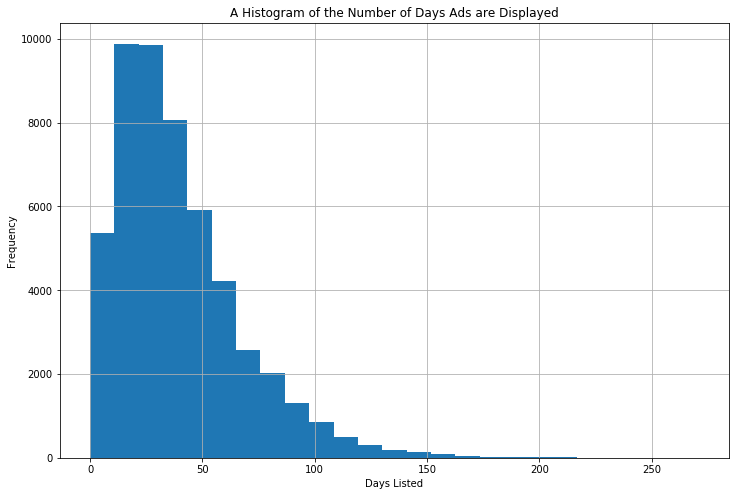

In [33]:
#Plotting a histogram of the number of days advertisements are displayed

hist_ad= df['days_listed'].hist(figsize=(12,8), bins= 25)

plt.xlabel("Days Listed")
plt.ylabel("Frequency")
plt.title("A Histogram of the Number of Days Ads are Displayed")
plt.show()



Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [34]:
# calculating mean of number of days ads published
round(df['days_listed'].mean(),0)



40.0

In [35]:
# calculating median of number of days ads published
round(df['days_listed'].median(),0)



33.0

In [36]:
# number of times ads lasted for 100 plus days
df[df['days_listed']>100].shape[0] 


1945

In [37]:
# number of times ads did not last up to a day
df[df['days_listed']<1].shape[0]

54

Conclusion: From the histogram data above, we can conclude that an ad normally publishes for 40 days on average. There are 1945 times (taking 100 days as a benchmark) that ads lasted for a long time whereas there are 54 times, ads were removed.

•	Analyze the number of ads and the average price for each type of vehicle. 

In [38]:
#Analyzing the number of ads and the average price for each type of vehicle

filtered_df['type'] = df['type']

#print(filtered_df.head(20))
ads_avgprice_pertype = filtered_df.pivot_table(index='type'
                                    , values= ['price']
                                   , aggfunc =['count', 'mean'])
ads_avgprice_pertype.columns= ['number_of_ads', 'avg_price']
ads_avgprice_pertype

,number_of_ads,avg_price
type,,
SUV,12073,10314.780088
bus,24,17135.666667
convertible,421,12407.159145
coupe,2221,13262.727600
hatchback,1045,6846.253589
mini-van,1157,8004.687986
offroad,206,13177.674757
other,251,10477.342629
pickup,6608,14588.977300


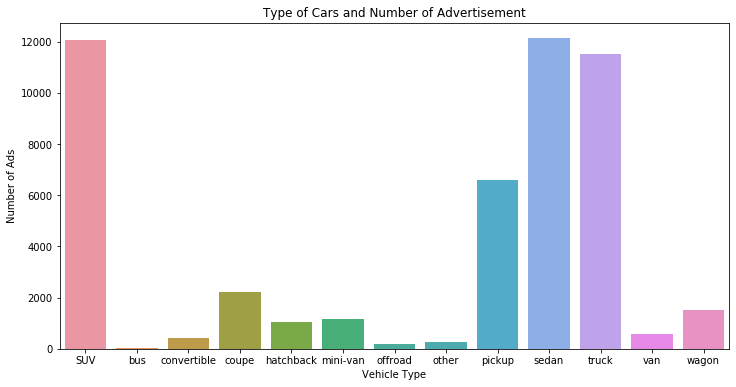

In [26]:
#Ploting a bar chart showing the dependence of the number of ads on the vehicle type.

import seaborn as sns

# Figure Size
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.barplot(x=ads_avgprice_pertype.index, y='number_of_ads'
            , data=ads_avgprice_pertype
            , ax=ax
            , capsize=10)

plt.ylabel('Number of Ads')
plt.xlabel('Vehicle Type')
plt.title('Type of Cars and Number of Advertisement')
          
plt.show()


#### Select the two types with the greatest number of ads

In [39]:
top_2_ads =ads_avgprice_pertype.sort_values(by='number_of_ads', ascending=False).index[0:2]
top_2_ads.tolist()


['sedan', 'SUV']

Conclusion:  From the graph above,we can conclude that SUV and sedan have greatest number of ads.

### What factors impact the price most? 

Studying whether the price depends on age, mileage, condition, transmission type, and color. 

Take each of the popular types you detected at the previous stage and 
study whether the price depends on age, mileage, condition, transmission type, and color. 

Create scatterplots for the rest. 

When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis

#### Taking each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color.

In [40]:
filtered_df_SUV = filtered_df.query('type =="SUV"')
filtered_df_sedan = filtered_df.query('type =="sedan"')
#print(filtered_df)

         price  vehicle_age   avg_mileage  cylinders  condition  days_listed  \
0       9400.0          7.0  20714.285714          6        2.0         19.0   
1      25500.0          7.0  12672.142857          6        2.0         50.0   
2       5500.0          6.0  18333.333333          4        4.0         79.0   
3       1500.0         16.0  11093.750000          8        1.0          9.0   
4      14900.0          2.0           NaN          4        3.0         28.0   
...        ...          ...           ...        ...        ...          ...   
51520   9249.0          5.0  17627.200000          6        4.0         37.0   
51521   2700.0         16.0  11343.750000          4        0.0         22.0   
51522   3950.0          9.0  14222.222222          4        3.0         32.0   
51523   7455.0          5.0  27914.600000          4        2.0         71.0   
51524   6300.0          4.0  24813.250000          4        2.0         10.0   

         type  
0         SUV  
1      

In [41]:
print(filtered_df_SUV)

         price  vehicle_age   avg_mileage  cylinders  condition  days_listed  \
0       9400.0          7.0  20714.285714          6        2.0         19.0   
7      15990.0          6.0  18245.500000          6        3.0         68.0   
8      11500.0          6.0  17362.333333          4        3.0         19.0   
9       9200.0         11.0  13381.000000          6        3.0         17.0   
14     12990.0         10.0  13228.500000          8        3.0         24.0   
...        ...          ...           ...        ...        ...          ...   
51495   9500.0          7.0  20642.857143          6        2.0          1.0   
51496   4999.0         16.0  11118.812500          6        3.0         59.0   
51500   6995.0          6.0  26166.666667          6        3.0         17.0   
51502   7995.0          8.0  13886.000000          4        4.0          NaN   
51516   8999.0          7.0  17428.571429          6        2.0         51.0   

      type  
0      SUV  
7      SUV  


### For categorical variables (transmission type and color), plot box-and-whisker charts . 

In [42]:
# adding two categorical variables (transmission type and color)

#filtered_df[['transmission','paint_color']] = df[['','']]

filtered_df['transmission'] = df[(df['days_listed'] > 50)]["transmission"]
filtered_df['paint_color'] = df[(df['days_listed'] > 50)]["paint_color"]
#print(filtered_df)


##### Student's comment:
this is how I tried to analyze the categorical variables. I am still doubtful. Is there a way to contact you if I need more hints?


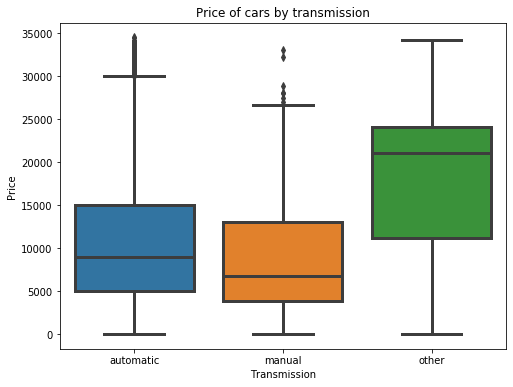

In [43]:
# categorical:plotting a boxplotbox to check if price dependent on transmission 

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x='transmission'
            , y='price'
            , data =filtered_df
            , linewidth =3
            , ax=ax)
plt.title('Price of cars by transmission')
plt.ylabel('Price')
plt.xlabel('Transmission')
plt.show()

Conclusion: Car price depends on transmission type. Manual transmission has the least median price, where as automatic tranmission has a medium price. Other transmissions(could be semi-automatic, dual-clutch and many latest tech) have higher prices which are kind of obvious.

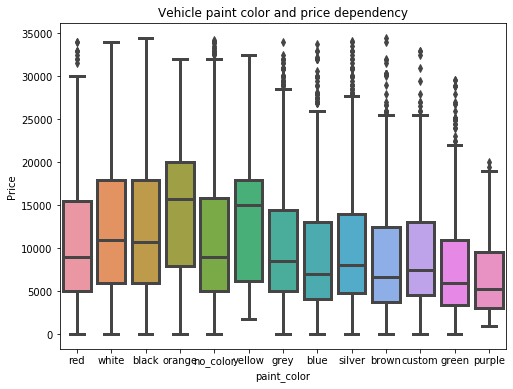

In [44]:
# categorical:Plotting a boxplot to see if price depends on the paint_color

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

sns.boxplot(x='paint_color'
            , y='price'
            , data =filtered_df
            , linewidth =3
            , ax=ax)
plt.title('Vehicle paint color and price dependency')
plt.ylabel('Price')
plt.xlabel('paint_color')
plt.show()

Conclusion: Price depends on the paint color. Yellow, black and orange colors have median prices whereas purple is least one.


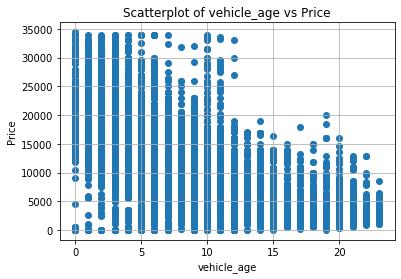

In [41]:
#For SUV: Displaying Price VS Vehicle_age relationships in scatter plots

plt.scatter(filtered_df_SUV['vehicle_age'], filtered_df_SUV['price'])
plt.title('Scatterplot of vehicle_age vs Price')
plt.xlabel('vehicle_age')
plt.ylabel('Price')
plt.grid()
plt.show()


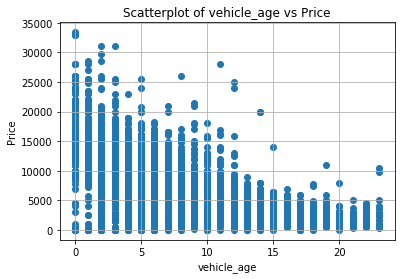

In [45]:
#For sedan: Displaying Price VS Vehicle_age relationships in scatter plots

plt.scatter(filtered_df_sedan['vehicle_age'], filtered_df_sedan['price'])
plt.title('Scatterplot of vehicle_age vs Price')
plt.xlabel('vehicle_age')
plt.ylabel('Price')
plt.grid()
plt.show()

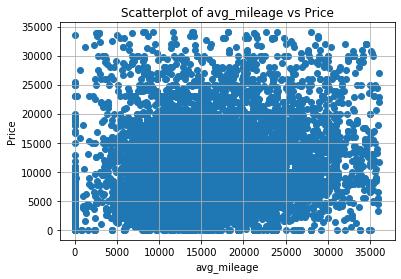

In [46]:
#For SUV: Displaying Price VS mileage relationships in scatter plots

plt.scatter(filtered_df_SUV['avg_mileage'], filtered_df_SUV['price'])
plt.title('Scatterplot of avg_mileage vs Price')
plt.xlabel('avg_mileage')
plt.ylabel('Price')
plt.grid()
plt.show()


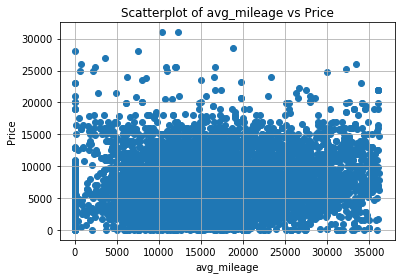

In [44]:
#For sedan: Displaying Price VS mileage relationships in scatter plots

plt.scatter(filtered_df_sedan['avg_mileage'], filtered_df_sedan['price'])
plt.title('Scatterplot of avg_mileage vs Price')
plt.xlabel('avg_mileage')
plt.ylabel('Price')
plt.grid()
plt.show()

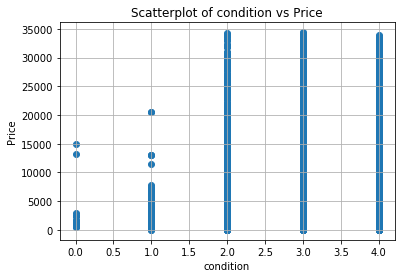

In [47]:
# For SUV: Displaying price VS condition relationships in scatter plots
plt.scatter(filtered_df_SUV['condition'], filtered_df_SUV['price'])
plt.title('Scatterplot of condition vs Price')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid()
plt.show()

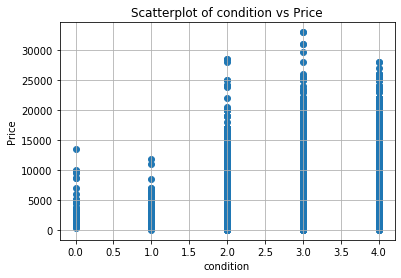

In [48]:
# For sedan: Displaying price VS condition relationships in scatter plots
plt.scatter(filtered_df_sedan['condition'], filtered_df_sedan['price'])
plt.title('Scatterplot of condition vs Price')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid()
plt.show()

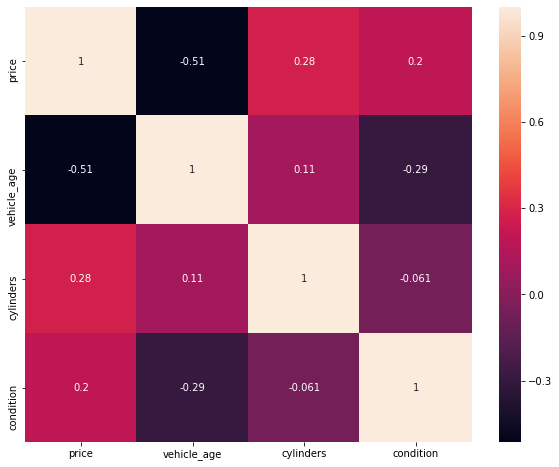

In [28]:
#Previewing the correlation among the quantitative variables with a seaborn heatmap

plt.figure(figsize = (10, 8))
sns.heatmap(filtered_df[['price'
                         , 'vehicle_age'
                         , 'cylinders'
                         , 'condition']].corr(), 
            annot = True)
          
plt.show()


Conclusion: There is a trend of price increases with a decrease in vehicle age.  The vehicle's age affects the price the most. Although the number of cylinders in a vehicle has a positive correlation with price, it has the least impact on price. There is also a positive and significant relationship between vehicle condition and price.

Conclusion: From the figure above, the vehicle age relates to the price. As vehicle ages, it becomes cheaper.

Conclusion: The more mileage a vehicle has, the lower the price is

Conclusion: Cars in a good condition have higher prices.

## Overall conclusion:

The goal of this project is to identify car sales advertisements in general.

To do that, we first preprocessed the dataset. We identified missing values and inconsistencies in the dataset and tried to identify why they were missing. The possible reasons for missing values could be many. However, we will report them to the concerned person so that we can prevent potential discrepancies in the future.

However, we tried to replace the missing values as accurately as we can by checking the relationship between mileage on a car, condition of the car and price of the car, and many more. 

We also changed the data types of  'price', 'vehicle age,' mileage', 'cylinders', 'condition' columns as changing them to integers made more sense. 

We calculated values like 'Day of the week, month, and year the ad was placed, the vehicle's age (in years) when the ads and vehicle's average mileage per year was placed so that we can better identify advertisements in car sales. 

We plotted graphs of the dataset to visualize the relationship of car prices with car types, models, transmissions, colors, vehicle age, and mileage. This was an indicator of the presence of outliers, which could greatly hinder the performance of our analysis. So, we only considered data less than the upper limits of outliers. We found out that outliers significantly affect the readability of histograms.

 An ad typically lasts for 40 days or so. About 54 ads lasted less than a day. The longest time an ad lasted for 1946 days.
 Sedan and SUV are the vehicle types with the highest number of ads.

Vehicle price depends on the type of vehicle transmission. Other transmissions have the highest median prices while manual transmissions have the lowest median prices.

-  We also checked the relationship between the year and the price of a car. Obviously, older cars are cheaper with some exceptions to antique cars and newer cars are always expensive. Among all of these, a vehicle's age correlates the greatest with a price.

-  Another main factor contributing to the price of a car was the condition of the car. Good and excellent condition cars were priced higher than fair and salvage cars. As we all know the more miles on the car, the price will go down. Cars with fewer miles are always expensive.